In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from core.data import load_from_kaggle


In [180]:
dataset_link = "nextmillionaire/car-accident-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw/car-accident-dataset' already exists with files. Skipping download (replace=False).


In [181]:
files

['Road Accident Data.csv']

In [182]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [183]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(307973, 21)

'Description'

,count,mean,std,min,25%,50%,75%,max
Latitude,307973.0,52.49,1.34,49.91,51.49,52.23,53.42,60.60
Longitude,307973.0,-1.37,1.36,-7.52,-2.25,-1.35,-0.21,1.76
Number_of_Casualties,307973.0,1.36,0.82,1.00,1.00,1.00,1.00,48.00
Number_of_Vehicles,307973.0,1.83,0.71,1.00,1.00,2.00,2.00,32.00
Speed_limit,307973.0,38.87,14.03,10.00,30.00,30.00,50.00,70.00


'Duplicates'

np.int64(1)

,Data Types,Missing Values,Unique Values,Sample Values
Accident_Index,object,0,197644,"[2.01E+12, 2.01E+12, 201050GC2K010]"
Accident Date,object,0,730,"[7/2/2022, 8/15/2021, 8/15/2022]"
Day_of_Week,object,0,7,"[Saturday, Friday, Saturday]"
Junction_Control,object,0,7,"[Give way or uncontrolled, Give way or uncontr..."
Junction_Detail,object,0,9,"[Other junction, Not at junction or within 20 ..."
Accident_Severity,object,0,4,"[Slight, Slight, Slight]"
Latitude,float64,0,264362,"[51.597205, 54.991137, 53.519804]"
Light_Conditions,object,0,5,"[Daylight, Daylight, Daylight]"
Local_Authority_(District),object,0,422,"[Lambeth, East Hertfordshire, Cheshire West an..."
Carriageway_Hazards,object,302549,5,"[nan, nan, nan]"


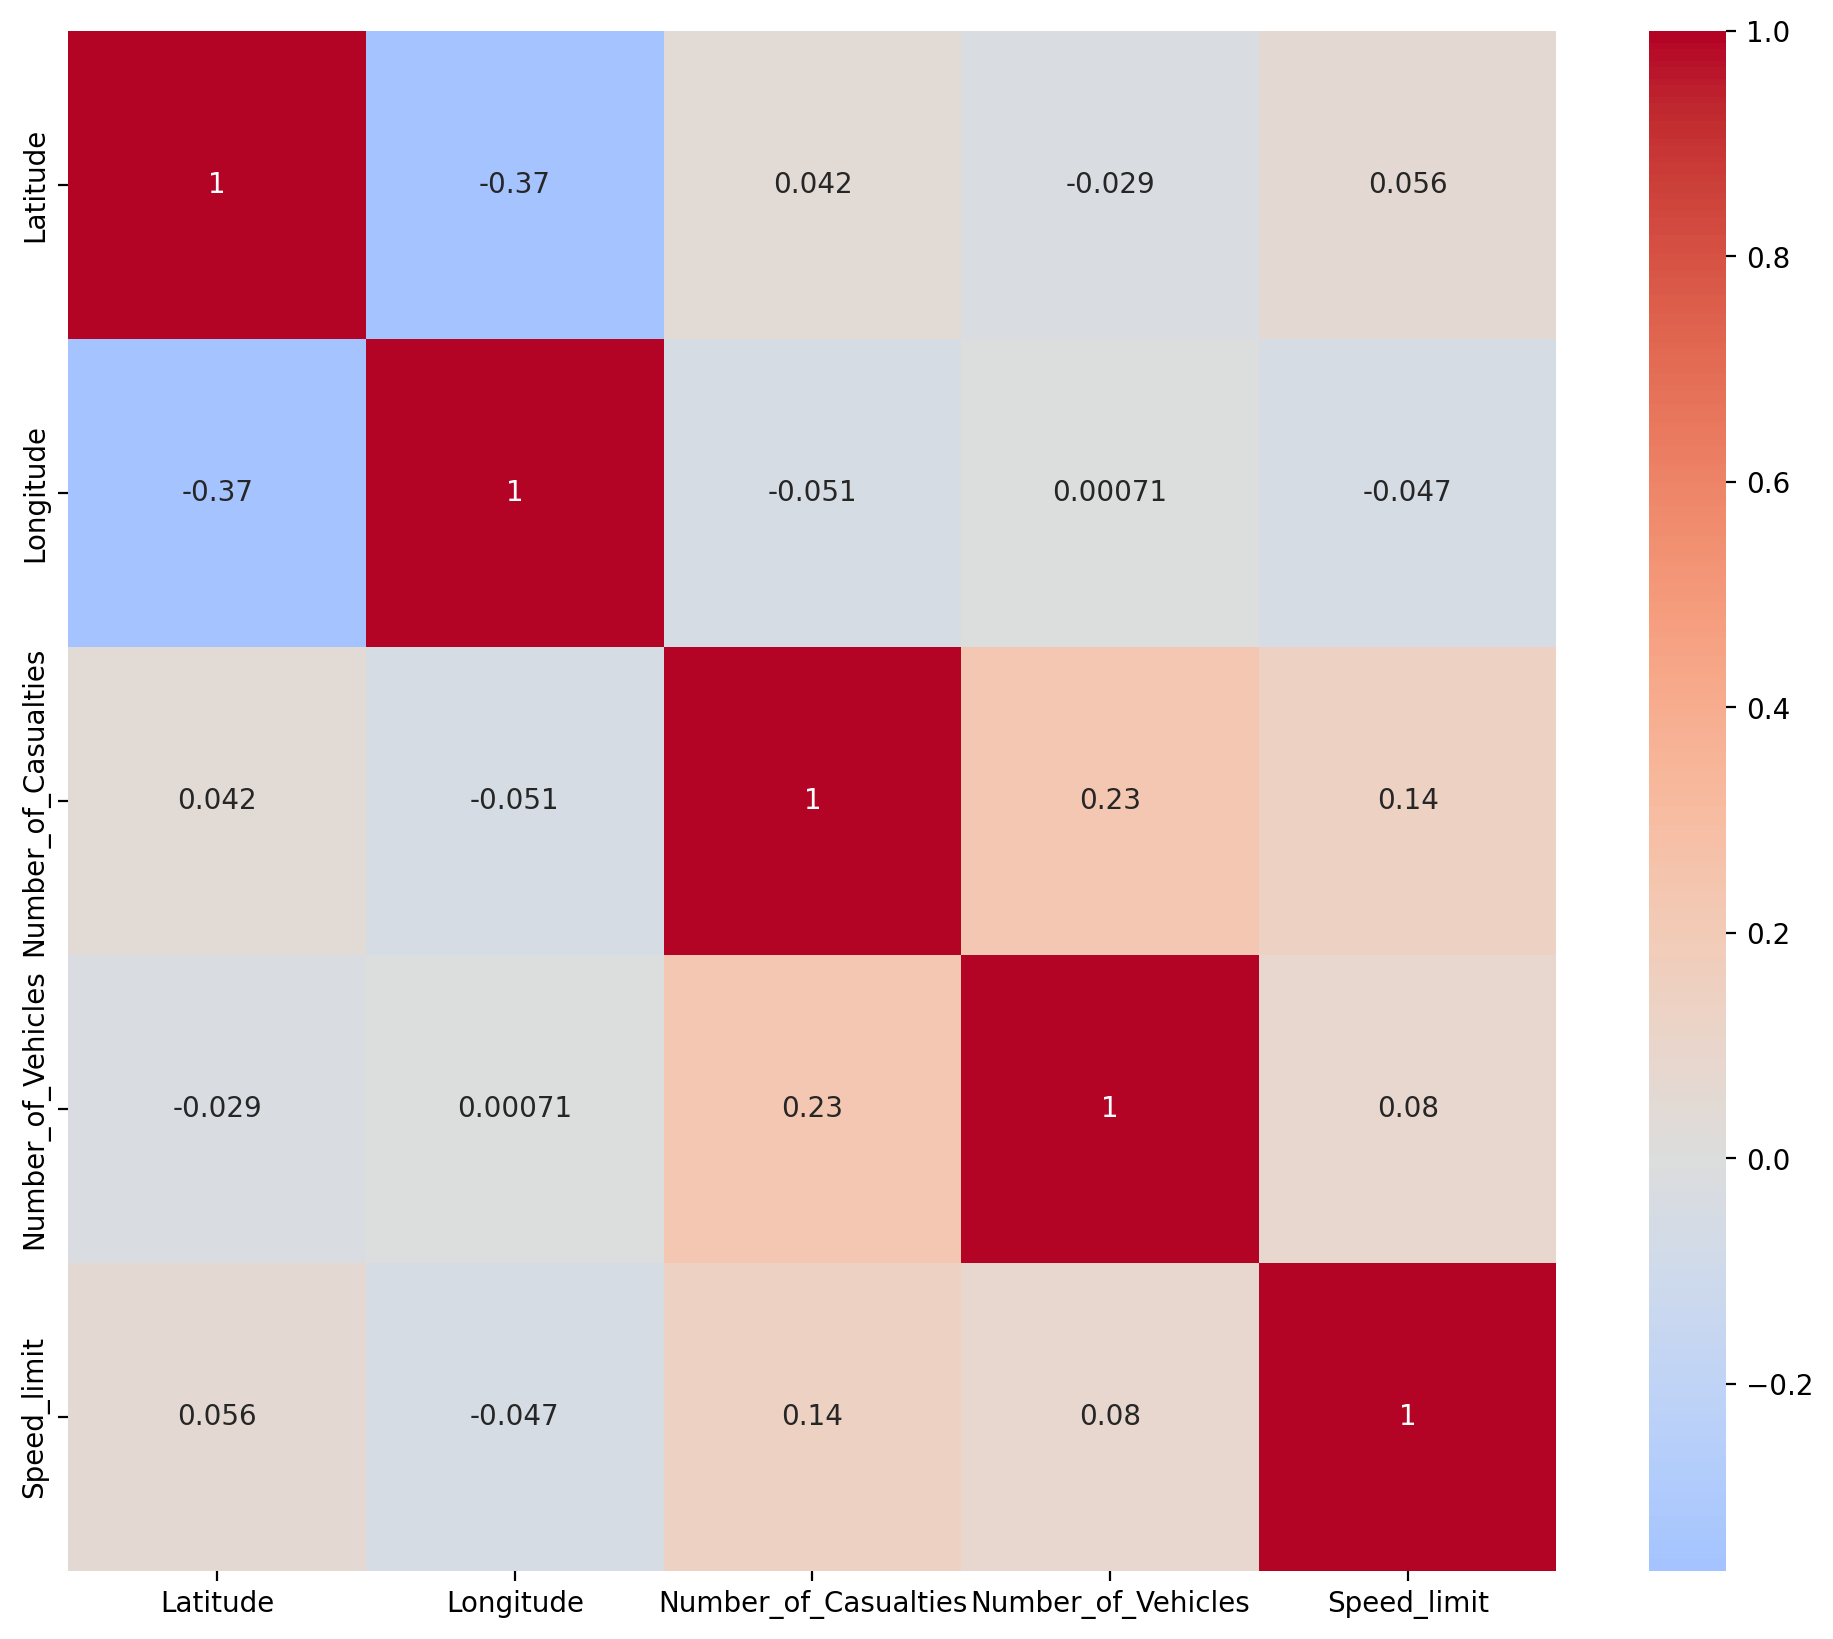

In [184]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [186]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,307973.0,52.487005,1.339011,49.914488,51.485248,52.225943,53.415517,60.598055
Longitude,307973.0,-1.368884,1.356092,-7.516225,-2.247937,-1.349258,-0.206810,1.759398
Number_of_Casualties,307973.0,1.356882,0.815857,1.000000,1.000000,1.000000,1.000000,48.000000
Number_of_Vehicles,307973.0,1.829063,0.710477,1.000000,1.000000,2.000000,2.000000,32.000000
Speed_limit,307973.0,38.866037,14.032933,10.000000,30.000000,30.000000,50.000000,70.000000


In [187]:
df.isna().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [188]:
df.nunique()

Accident_Index                197644
Accident Date                    730
Day_of_Week                        7
Junction_Control                   7
Junction_Detail                    9
Accident_Severity                  4
Latitude                      264362
Light_Conditions                   5
Local_Authority_(District)       422
Carriageway_Hazards                5
Longitude                     269856
Number_of_Casualties              28
Number_of_Vehicles                17
Police_Force                      51
Road_Surface_Conditions            5
Road_Type                          5
Speed_limit                        8
Time                            1439
Urban_or_Rural_Area                2
Weather_Conditions                 8
Vehicle_Type                      15
dtype: int64

In [189]:
df = df.drop(columns='Carriageway_Hazards')

df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(
    df['Road_Surface_Conditions'].mode()[0]
)

df['Road_Type'] = df['Road_Type'].fillna(
    df['Road_Type'].mode()[0]
)

df['Accident_Severity'] = df['Accident_Severity'].replace('Fetal', 'Fatal')

df = df.drop(columns=[
    'Latitude',
    'Longitude',
    'Junction_Control',
    'Local_Authority_(District)',
    'Police_Force'
])


In [190]:
df.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [191]:
# Extract only the hour from 'Time'
df['Time'] = df['Time'].str.split(':').str[0]

# Convert 'Time' column to float
df['Time'] = df['Time'].astype(float)

# Calculate the mean hour (rounded)
mean_time = df['Time'].mean().round(0)

# Fill missing values with the mean hour
df['Time'] = df['Time'].fillna(mean_time)

# Rename columns
df = df.rename(columns={
    'Accident_Severity': 'Accident_Injuries',
    'Number_of_Casualties': 'death_toll',
    'Accident_Index': 'Accident_ID',
    'Time': 'Hour_of_Accident'
})


In [194]:
# Creating a Pivot Table to analyze number of death values based on 'Accident Date' and 'Hour_of_Accident'
pivot_table = (
    df
    .groupby(['Accident Date', 'Hour_of_Accident'])['death_toll']
    .mean()
    .unstack()
    .round(0)
)

pivot_table

Hour_of_Accident,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Accident Date,,,,,,,,,,,,,,,,,,,,,
1/1/2021,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1/1/2022,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
1/10/2021,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1/10/2022,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
1/11/2021,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/7/2022,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
9/8/2021,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
9/8/2022,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


In [ ]:
category_mapping = {
    'Car': 'Car',
    'Taxi/Private hire car': 'Taxi',
    'Bus or coach (17 or more pass seats)': 'Bus',
    'Pedal cycle': 'Pedal cycle',
    'Ridden horse': 'Ridden horse',

    # Zusammengefasste Gruppen
    'Van / Goods 3.5 tonnes mgw or under': 'Van',
    'Goods over 3.5t. and under 7.5t': 'Other',
    'Goods 7.5 tonnes mgw and over': 'Other',
    'Agricultural vehicle': 'Other',
    'Minibus (8 - 16 passenger seats)': 'Other',
    'Other vehicle': 'Other',

    'Motorcycle over 500cc': 'Motorcycle',
    'Motorcycle over 125cc and up to 500cc': 'Motorcycle',
    'Motorcycle 125cc and under': 'Motorcycle',
    'Motorcycle 50cc and under': 'Motorcycle'
}

df['Vehicle_Type'] = df['Vehicle_Type'].map(category_mapping)
